In [1]:
import pyexr
import json
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import open3d as o3d
import json

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
def pc_img_to_pcd(pc_img, color_img=None):
    pc_3d = pc_img.reshape(-1,3)
    if color_img is None:
        colors_3d = np.zeros_like(pc_3d)
    else:
        colors_3d = color_img.reshape(-1,3)
    #remove nan points
    colors_3d = colors_3d[~np.isnan(pc_3d).any(axis=1)]
    pc_3d = pc_3d[~np.isnan(pc_3d).any(axis=1)]
    assert pc_3d.shape == colors_3d.shape

    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(pc_3d)
    pcd.colors = o3d.utility.Vector3dVector(colors_3d / 255.0)
    return pcd



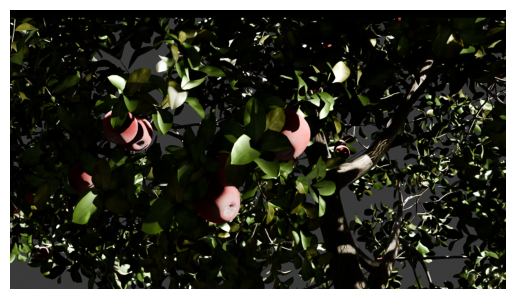

In [3]:
rgb_img = cv2.imread('/home/siddhartha/RIVAL/learning2localize/blender/dataset/apple_orchard/c2083317-49fc-4530-9a23-447f6ca19da1_rgb0000.png')
rgb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.axis('off') 
plt.show()

cv2.imwrite('/home/siddhartha/Downloads/rgb.png', cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)) 

pc_path = '/home/siddhartha/RIVAL/learning2localize/blender/dataset/apple_orchard/c2083317-49fc-4530-9a23-447f6ca19da1_pc.npy'
pc_img = np.load(pc_path)

pcd= pc_img_to_pcd(pc_img, rgb_img)
o3d.visualization.draw_geometries([pcd])

In [4]:
import sys 
sys.path.append('/home/siddhartha/RIVAL/learning2localize/blender')
import utils
exr_path = '/home/siddhartha/RIVAL/learning2localize/blender/dataset/apple_orchard/c2083317-49fc-4530-9a23-447f6ca19da1_id0000.exr'
id_mapping_path = '/home/siddhartha/RIVAL/learning2localize/blender/dataset/apple_orchard/c2083317-49fc-4530-9a23-447f6ca19da1_id_map.json'
visible_objs, object_ids,inst_mask, id_to_name = utils.get_visible_objects(exr_path, id_mapping_path)

visible_objs

[(6, 'apple6'),
 (8, 'apple8'),
 (15, 'apple15'),
 (16, 'apple16'),
 (18, 'apple18'),
 (21, 'apple21'),
 (22, 'apple22'),
 (25, 'apple25'),
 (33, 'apple33'),
 (34, 'apple34'),
 (46, 'apple46'),
 (47, 'apple47'),
 (52, 'apple52'),
 (53, 'apple53'),
 (59, 'apple59'),
 (73, 'apple73'),
 (74, 'apple74'),
 (78, 'apple78'),
 (88, 'apple88'),
 (90, 'apple90'),
 (96, 'apple96'),
 (103, 'apple103'),
 (104, 'apple104'),
 (105, 'apple105'),
 (116, 'apple116'),
 (119, 'apple119'),
 (125, 'apple125'),
 (130, 'apple130'),
 (152, 'apple152'),
 (166, 'apple166'),
 (167, 'apple167'),
 (172, 'apple172'),
 (183, 'apple183'),
 (199, 'apple199'),
 (201, 'branches.000'),
 (217, 'branches.016'),
 (218, 'branches.017'),
 (219, 'branches.018'),
 (224, 'branches.023'),
 (228, 'branches.027'),
 (257, 'branches.056'),
 (263, 'branches.062'),
 (264, 'branches.063'),
 (270, 'branches.069'),
 (271, 'branches.070'),
 (320, 'branches.119'),
 (323, 'branches.122'),
 (328, 'branches.127'),
 (332, 'branches.131'),
 (333,

In [5]:
object_ids.shape

(720, 1280)

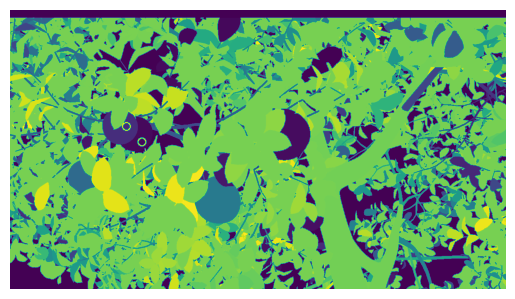

(33, 6)

In [6]:
object_ids_cp = object_ids.copy().astype(np.uint8)
cv2.circle(object_ids_cp, (300, 300), 10, 255, 2)
cv2.circle(object_ids_cp, (340, 340), 10, 255, 2)
plt.imshow(object_ids_cp)
plt.axis('off')
plt.show()

object_ids[300, 300], object_ids[340, 340]


reindexing id 6 to 1
reindexing id 8 to 2
reindexing id 15 to 3
reindexing id 16 to 4
reindexing id 18 to 5
reindexing id 21 to 6
reindexing id 22 to 7
reindexing id 25 to 8
reindexing id 33 to 9
reindexing id 34 to 10
reindexing id 46 to 11
reindexing id 47 to 12
reindexing id 52 to 13
reindexing id 53 to 14
reindexing id 59 to 15
reindexing id 73 to 16
reindexing id 74 to 17
reindexing id 78 to 18
reindexing id 88 to 19
reindexing id 90 to 20
reindexing id 96 to 21
reindexing id 103 to 22
reindexing id 104 to 23
reindexing id 105 to 24
reindexing id 116 to 25
reindexing id 119 to 26
reindexing id 125 to 27
reindexing id 130 to 28
reindexing id 152 to 29
reindexing id 166 to 30
reindexing id 167 to 31
reindexing id 172 to 32
reindexing id 183 to 33
reindexing id 199 to 34
reindexing id 201 to 35
reindexing id 217 to 36
reindexing id 218 to 37
reindexing id 219 to 38
reindexing id 224 to 39
reindexing id 228 to 40
reindexing id 257 to 41
reindexing id 263 to 42
reindexing id 264 to 43


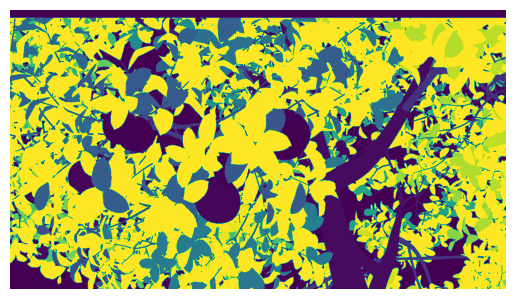

In [7]:
# reindex the object ids to 0,1,2,...
for i, (id, name) in enumerate(visible_objs):
    visible_objs[i] = (i+1, name)
    object_ids[object_ids == id] = i+1
    print("reindexing id {} to {}".format(id, i+1))

plt.imshow(object_ids)
plt.axis('off')
plt.show()

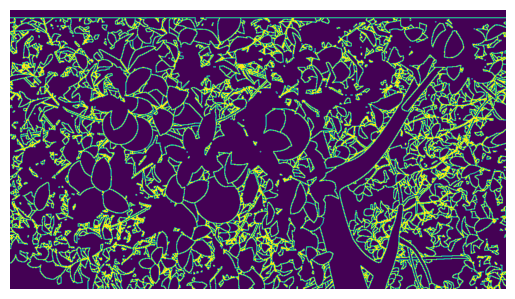

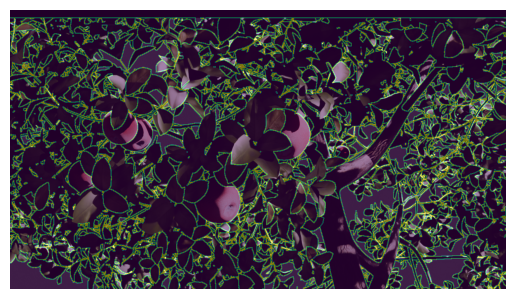

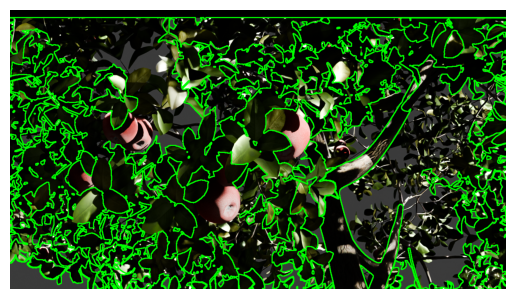

[[[1218  718]]

 [[1218  719]]

 [[1221  719]]

 [[1221  718]]]


In [8]:
object_ids = object_ids.astype(np.uint8)
sobelx = cv2.Sobel(object_ids, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(object_ids, cv2.CV_64F, 0, 1, ksize=3)

# Gradient magnitude
magnitude = cv2.magnitude(sobelx, sobely)
magnitude = cv2.convertScaleAbs(magnitude)

_, edges = cv2.threshold(magnitude, 1, 255, cv2.THRESH_BINARY)
plt.imshow(edges)
plt.axis('off')
plt.show()

plt.imshow(rgb_img)
plt.imshow(edges, alpha=0.5)
plt.axis('off')
plt.show()

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Draw contours on the original image
contour_img = rgb_img.copy()
for i, contour in enumerate(contours):
    # Draw each contour with a different color
    cv2.drawContours(contour_img, contours, i, (0, 255, 0), 2)
    
plt.imshow(contour_img)
plt.axis('off')
plt.show()

print(contours[0])

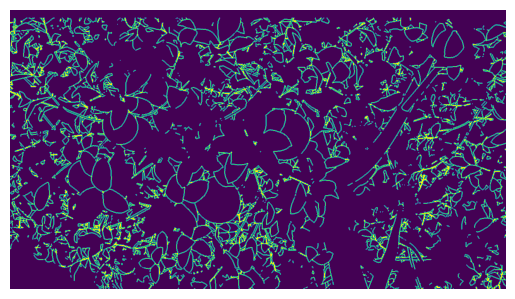

In [9]:


def find_shared_edges_and_ids(instance_mask):
    H, W = instance_mask.shape
    edge_map = np.zeros((H, W), dtype=np.uint8)
    edge_to_id_pair = {}

    # Pad to avoid boundary issues
    padded = np.pad(instance_mask, ((1,1), (1,1)), mode='constant', constant_values=0)

    # Directions: top, bottom, left, right
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    for y in range(1, H+1):
        for x in range(1, W+1):
            center_id = padded[y, x]
            if center_id == 0:
                continue  # Skip background

            for dy, dx in neighbors:
                neighbor_id = padded[y+dy, x+dx]
                if neighbor_id != center_id and neighbor_id != 0:
                    # Inter-instance edge
                    edge_map[y-1, x-1] = 255
                    id_pair = tuple(sorted((center_id, neighbor_id)))  # (smaller, larger)
                    edge_to_id_pair[(y-1, x-1)] = id_pair
                    break  # Already found a neighbor with a different ID

    return edge_map, edge_to_id_pair

edge_map, edge_to_id_pair = find_shared_edges_and_ids(object_ids)
plt.imshow(edge_map)
plt.axis('off')
plt.savefig('/home/siddhartha/Downloads/contour_map.png', bbox_inches='tight', pad_inches=0)
plt.show()


In [10]:
shared_contours = {}
for xy, id_pair in edge_to_id_pair.items():
    id = '_'.join([str(int(id)) for id in sorted(list(id_pair))])
    if id not in shared_contours:
        shared_contours[id] = []
    shared_contours[id].append(xy)
len(shared_contours.keys())

2090

In [11]:
mean_depths = {}
def add_flying_pixels(pc_im, shared_contours, displacement_std=0.015):
    """Add flying pixels at depth discontinuities."""
    pc_img = pc_im.copy()
    # Add noise to edge points
    for key in shared_contours:
        obj1, obj2 = key.split('_')
        obj1 = int(obj1)
        obj2 = int(obj2)

        obj1_mean_depth = mean_depths.get(obj1, np.nanmean(pc_img[object_ids == obj1]))
        obj2_mean_depth = mean_depths.get(obj2, np.nanmean(pc_img[object_ids == obj2]))
        mean_depths[obj1] = obj1_mean_depth
        mean_depths[obj2] = obj2_mean_depth
        
        for pt_idx in shared_contours[key][::5]:
            if np.isnan(pc_img[pt_idx[0], pt_idx[1]]).any():
                continue
            neighborhood = pc_img[pt_idx[0]-2:pt_idx[0]+3, pt_idx[1]-2:pt_idx[1]+3, 2]
            bigger_neighborhood = pc_img[pt_idx[0]-5:pt_idx[0]+6, pt_idx[1]-5:pt_idx[1]+6, 2]
            # noise = np.random.normal(0,displacement_std, neighborhood.shape)
            depth_diff = abs(obj1_mean_depth - obj2_mean_depth)

            # noise = -1*abs(np.random.normal(0, displacement_std, neighborhood.shape))
            noise  = np.random.uniform(-depth_diff, 0, neighborhood.shape)


            normal_noise = -1*abs(np.random.normal(0, displacement_std, bigger_neighborhood.shape))

            # only noise the pixels of the front object
            if obj1_mean_depth < obj2_mean_depth:
                noise[neighborhood < obj1_mean_depth] = 0
                normal_noise[bigger_neighborhood < obj1_mean_depth] = 0
            else:
                noise[neighborhood > obj1_mean_depth] = 0
                normal_noise[bigger_neighborhood > obj1_mean_depth] = 0
            
            pc_img[pt_idx[0]-2:pt_idx[0]+3, pt_idx[1]-2:pt_idx[1]+3, 2] += noise
            pc_img[pt_idx[0]-5:pt_idx[0]+6, pt_idx[1]-5:pt_idx[1]+6, 2] += normal_noise
    return pc_img


noised_pc_img = add_flying_pixels(pc_img, shared_contours)
pcd_noised = pc_img_to_pcd(noised_pc_img, rgb_img)
o3d.visualization.draw_geometries([pcd_noised])

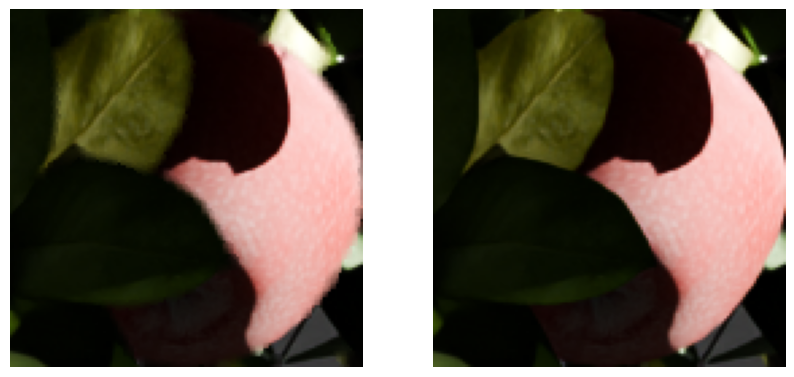

In [12]:
def blur_img_edges(rgb_im, shared_contours, blur_radius=2):
    """Blur the edges of the image."""
    rgb_img = rgb_im.copy()
    for key in shared_contours:
        obj1, obj2 = key.split('_')
        obj1 = int(obj1)
        obj2 = int(obj2)

        for pt_idx in shared_contours[key][::5]:
            if np.isnan(rgb_img[pt_idx[0], pt_idx[1]]).any():
                continue
            # Get the region around the edge point
            x, y = pt_idx
            x_start = max(0, x - blur_radius)
            x_end = min(rgb_img.shape[0], x + blur_radius)
            y_start = max(0, y - blur_radius)
            y_end = min(rgb_img.shape[1], y + blur_radius)

            # Apply Gaussian blur to the region
            rgb_img[x_start:x_end, y_start:y_end] = cv2.GaussianBlur(rgb_img[x_start:x_end, y_start:y_end], (3, 3), 0)
    return rgb_img

blurred_rgb_img = blur_img_edges(rgb_img, shared_contours)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
x1, y1, x2, y2 = 644.0, 388.0, 775.0, 255.0
# cv2.rectangle(blurred_rgb_img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
ax[0].imshow(blurred_rgb_img[int(y2):int(y1), int(x1):int(x2)])
ax[0].axis('off')
ax[1].imshow(rgb_img[int(y2):int(y1), int(x1):int(x2)])
ax[1].axis('off')
plt.show()

In [17]:
def add_distance_based_noise(pc_im):
    pc_img = pc_im.copy()
    print(pc_img.shape)
    # add noise based on z val. higher z val, more noise
    ## ±4 mm + 0.25% of depth
    noise = np.random.normal(0, 0.0004 + 0.0025 * -1*pc_img[:, :, 2], pc_img[:,:,2].shape)
    pc_img[:, :, 2] += noise
    return pc_img

noised_pc_img = add_distance_based_noise(noised_pc_img)
pcd_noised = pc_img_to_pcd(noised_pc_img, blurred_rgb_img)
o3d.visualization.draw_geometries([pcd_noised])

(720, 1280, 3)


In [16]:
def random_dropout(pc_img, rgb_img, dropout_rate=0.9):
    """Randomly drop points in the point cloud and associated RGB values."""
    pc_img = pc_img.copy()
    rgb_img = rgb_img.copy()
    mask = np.random.rand(*pc_img.shape[:2]) < dropout_rate
    pc_img[mask] = np.nan
    rgb_img[mask] = 0
    return pc_img, rgb_img

dropped_noised_pc_img, dropped_rgb = random_dropout(noised_pc_img, blurred_rgb_img, dropout_rate=0.75)
dropped_noised_pcd = pc_img_to_pcd(dropped_noised_pc_img, dropped_rgb)
o3d.visualization.draw_geometries([dropped_noised_pcd])

print("Num points before", np.sum(~np.isnan(pc_img)))
print("Num points after", np.sum(~np.isnan(dropped_noised_pc_img)))

Num points before 2405562
Num points after 601350


In [18]:
test_pc_path = '/media/siddhartha/sea/RIVAL_DATA/alacs_tof/10-21/2/20241021-152650_pc.npy'
test_pc_img = np.load(test_pc_path)
test_pc_3d = test_pc_img.reshape(-1,3)
test_pc_3d = test_pc_3d[~np.isnan(test_pc_3d).any(axis=1)]
print("Total valid points", sum(test_pc_3d[:,2] > 0))

test_rgb_path = '/media/siddhartha/sea/RIVAL_DATA/alacs_tof/10-21/2/20241021-152650_2284.90954_rgb.png'
test_rgb_img = cv2.imread(test_rgb_path)
test_rgb_img = cv2.cvtColor(test_rgb_img, cv2.COLOR_BGR2RGB)

pcd = pc_img_to_pcd(test_pc_img, test_rgb_img)
o3d.visualization.draw_geometries([pcd])


Total valid points 578062
